### EDA CSV BegInvFINAL12312016

In [1]:
# Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
#Cargar el dataset
df_InventarioInicial = pd.read_csv("Dataset/BegInvFINAL12312016.csv")
df_InventarioInicial.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [5]:
# Obtener información general del dataset
df_InventarioInicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [6]:
# Descripción estadística básica
df_InventarioInicial.describe()

,Store,Brand,onHand,Price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,22.253910
std,23.191393,13059.429355,31.467342,70.178964
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,13999.900000


In [7]:
# Verificación de valores nulos
df_InventarioInicial.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [8]:
# Verificar si hay filas duplicadas
duplicated_rows = df_InventarioInicial.duplicated()

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()

# Mostrar el número de filas duplicadas
print(f'Número de filas duplicadas: {num_duplicated_rows}')

# Opcional: Mostrar las filas duplicadas
if num_duplicated_rows > 0:
    print(df_InventarioInicial[duplicated_rows])

Número de filas duplicadas: 0


In [9]:
#Se verifica el tipo de dato de cada columna
print(df_InventarioInicial.dtypes)

InventoryId     object
Store            int64
City            object
Brand            int64
Description     object
Size            object
onHand           int64
Price          float64
startDate       object
dtype: object


In [10]:
#  Convertir las fechas a formato datetime para análisis de fechas
df_InventarioInicial['startDate'] = pd.to_datetime(df_InventarioInicial['startDate'])

#### La columna StartDate es 100% la fecha 2016-01-01

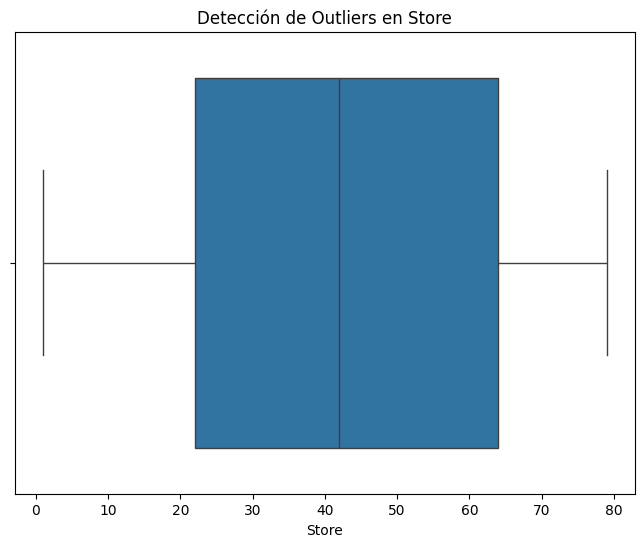

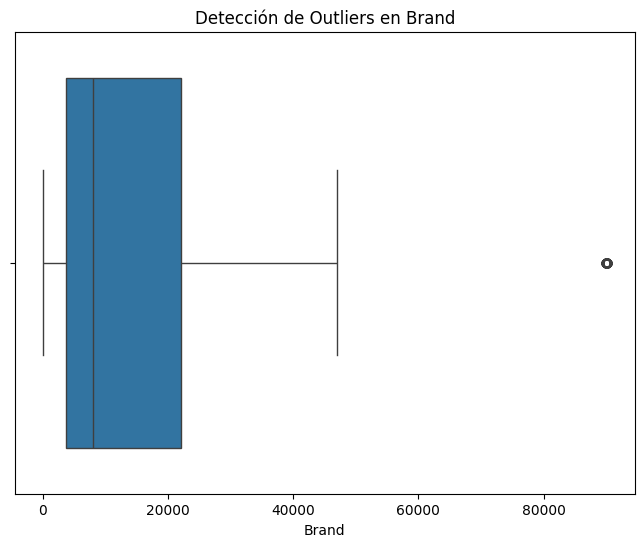

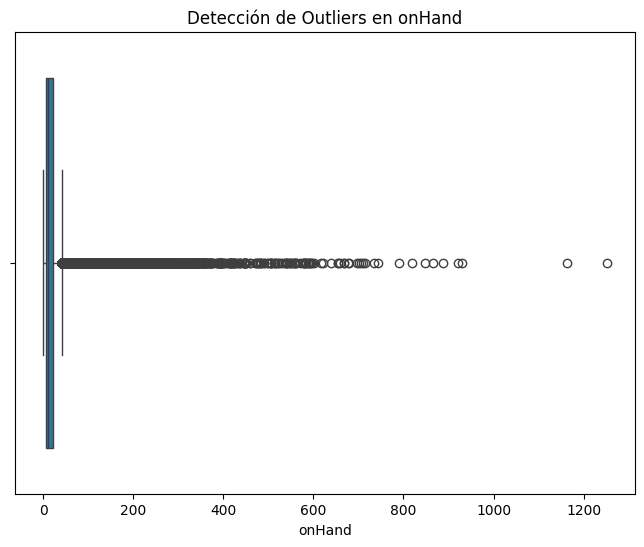

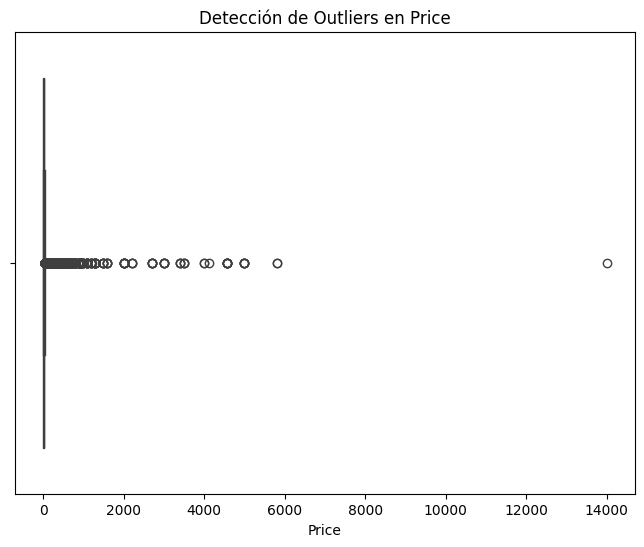

In [11]:
# Detección de outliers columnas (ajusta el nombre de la columna según el dataset)
# Filtrar las columnas numéricas del DataFrame
columnas_numericas = df_InventarioInicial.select_dtypes(include=['float64', 'int64']).columns

# Iterar sobre las columnas numéricas
for columna in columnas_numericas:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df_InventarioInicial[columna])
    plt.title(f'Detección de Outliers en {columna}')
    plt.show()

In [12]:
# Función para detectar y mostrar outliers de una columna
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[columna].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango Intercuartílico

    # Definir los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar las filas que están fuera de los límites (outliers)
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    return outliers

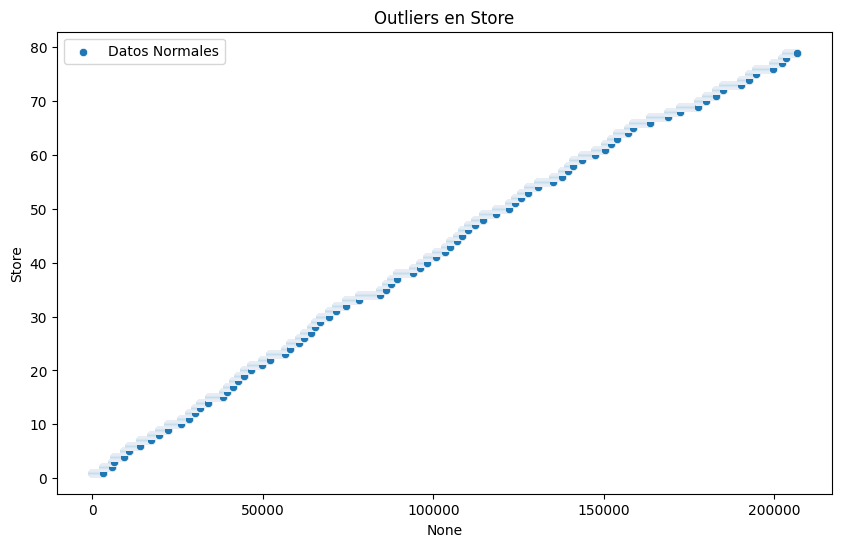

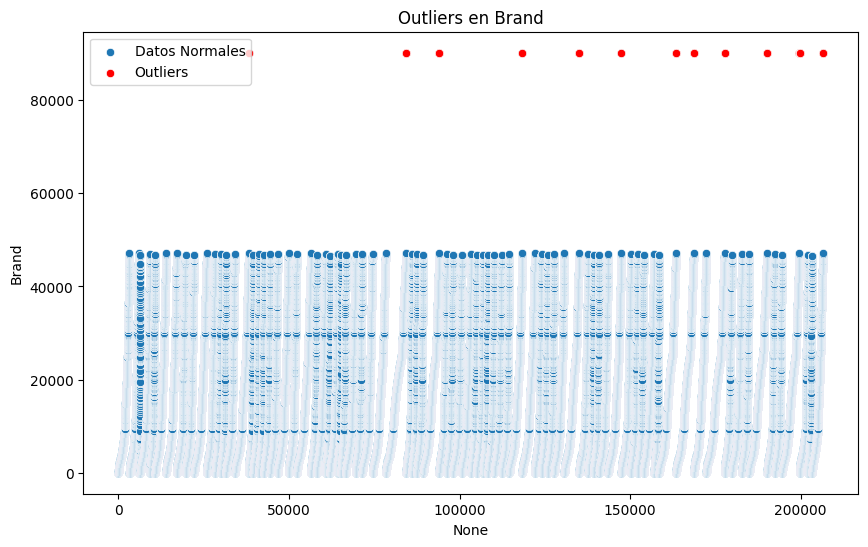

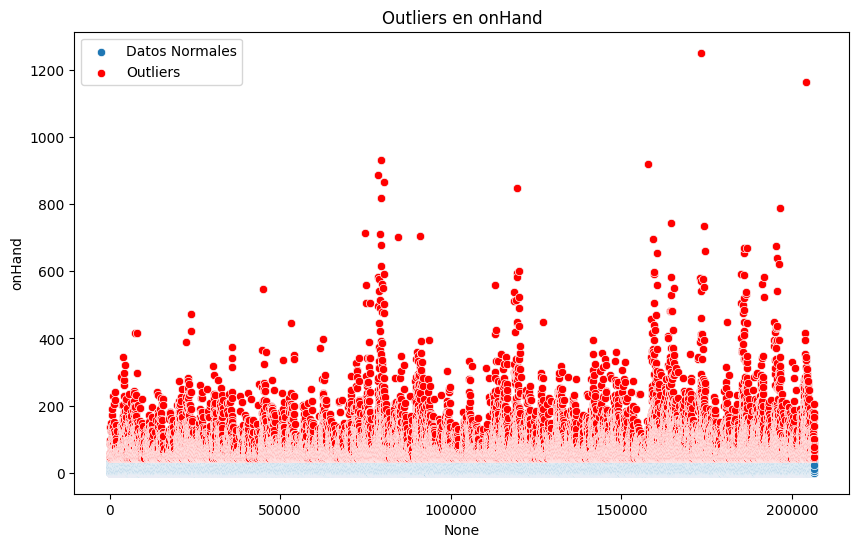

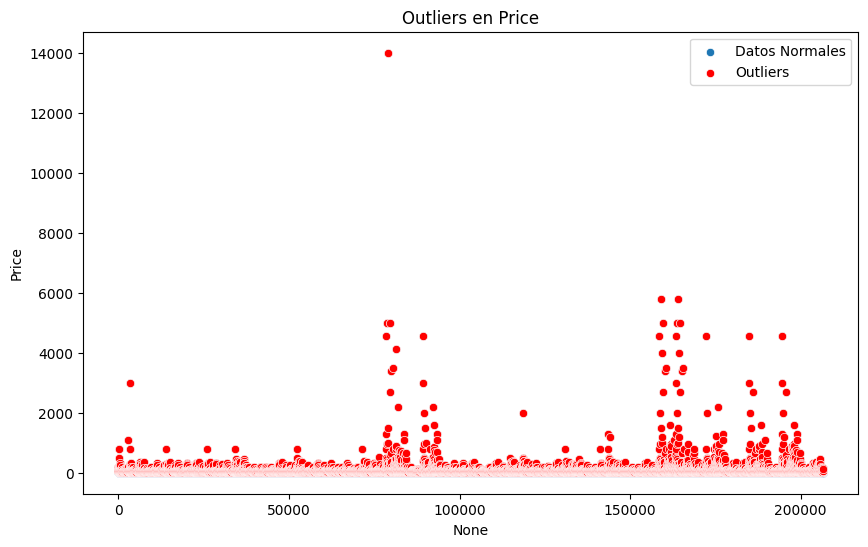

In [13]:
# Gráfico para mostrar outliers junto con datos normales
columnas_a_verificar = df_InventarioInicial.select_dtypes(include=['float64', 'int64']).columns

for columna in columnas_a_verificar:
    plt.figure(figsize=(10,6))
    
    # Graficar los puntos de la columna
    sns.scatterplot(x=df_InventarioInicial.index, y=df_InventarioInicial[columna], label='Datos Normales')

    # Graficar los puntos de los outliers
    outliers = detectar_outliers(df_InventarioInicial, columna)
    sns.scatterplot(x=outliers.index, y=outliers[columna], color='red', label='Outliers')
    
    plt.title(f'Outliers en {columna}')
    plt.legend()
    plt.show()

In [14]:
# Ver las filas con outliers para una columna específica ('Brand')
outliers_Freight = detectar_outliers(df_InventarioInicial, 'Brand')
print(outliers_Freight)

               InventoryId  Store       City  Brand  \
38240    15_WANBORNE_90013     15   WANBORNE  90013   
84373   34_PITMERDEN_90010     34  PITMERDEN  90010   
84374   34_PITMERDEN_90011     34  PITMERDEN  90011   
84375   34_PITMERDEN_90012     34  PITMERDEN  90012   
84376   34_PITMERDEN_90013     34  PITMERDEN  90013   
...                    ...    ...        ...    ...   
199670  76_DONCASTER_90088     76  DONCASTER  90088   
199671  76_DONCASTER_90089     76  DONCASTER  90089   
199672  76_DONCASTER_90090     76  DONCASTER  90090   
206527  79_BALLYMENA_90011     79  BALLYMENA  90011   
206528  79_BALLYMENA_90089     79  BALLYMENA  90089   

                         Description   Size  onHand   Price  startDate  
38240   Ch Leoville Barton 12 St Jul  750mL      12   99.99 2016-01-01  
84373       Ch Smith Haut Lafitte 12  750mL      30   91.99 2016-01-01  
84374   Ch Pichon Longville 12 Pauil  750mL      23  144.99 2016-01-01  
84375    Ch Malartic Lagravier 12 RG  750mL    

In [15]:
# Verificar si hay valores negativos en las columnas numéricas
negatives = df_InventarioInicial.select_dtypes(include=['number']) < 0

# Obtener los nombres de las columnas que tienen valores negativos
negative_columns = negatives.any()

# Filtrar las columnas que tienen al menos un valor negativo
columns_with_negatives = negative_columns[negative_columns].index.tolist()

# Mostrar los resultados
if columns_with_negatives:
    print(f"Columnas con valores negativos: {columns_with_negatives}")
    for column in columns_with_negatives:
        print(f"\nValores negativos en la columna '{column}':")
        print(df_InventarioInicial[df_InventarioInicial[column] < 0])
else:
    print("No hay valores negativos en el DataFrame.")

No hay valores negativos en el DataFrame.


In [16]:
#Se analizan las distintas columnas 

for i in df_InventarioInicial.columns:
    print(i)
    print(df_InventarioInicial[i].describe()) #descripcion basica 
    print('--------------------------------------')

InventoryId
count                 206529
unique                206529
top       79_BALLYMENA_90089
freq                       1
Name: InventoryId, dtype: object
--------------------------------------
Store
count    206529.000000
mean         42.122457
std          23.191393
min           1.000000
25%          22.000000
50%          42.000000
75%          64.000000
max          79.000000
Name: Store, dtype: float64
--------------------------------------
City
count        206529
unique           67
top       MOUNTMEND
freq          14264
Name: City, dtype: object
--------------------------------------
Brand
count    206529.000000
mean      13761.482320
std       13059.429355
min          58.000000
25%        3746.000000
50%        8010.000000
75%       22143.000000
max       90090.000000
Name: Brand, dtype: float64
--------------------------------------
Description
count                   206529
unique                    7291
top       Jagermeister Liqueur
freq                       459


In [32]:
# Agrupar por 'Store', 'Brand' y 'description' y sumar el stock de 'onHand'
StockEnTienda = df_InventarioInicial.groupby(['Store', 'Brand', 'Description'])['onHand'].sum().reset_index(name='Stock Total')

# Ordenar por la columna 'Stock Total' en orden descendente para ver las combinaciones con mayor stock
StockEnTienda = StockEnTienda.sort_values(by='Stock Total', ascending=False)

# Seleccionar las 10 combinaciones con mayor stock
top_stock = StockEnTienda.head(10)

# Mostrar la tabla de las 10 tiendas, marcas y nombres con mayor stock
print("Top 10 Marcas con Mayor Stock por Tienda:")
print(top_stock)


Top 10 Marcas con Mayor Stock por Tienda:
        Store  Brand              Description  Stock Total
173397     69   3858         Grey Goose Vodka         1251
204102     79   3859        Smirnoff 80 Proof         1163
79437      34   3876        Smirnoff 80 Proof          930
157944     65   7341      Smirnoff Watermelon          921
78556      34   1233  Jack Daniels No 7 Black          888
80298      34   8068         Absolut 80 Proof          865
119474     50   4261   Capt Morgan Spiced Rum          848
79432      34   3858         Grey Goose Vodka          818
196395     76   8068         Absolut 80 Proof          789
164412     67   3545          Ketel One Vodka          743


C:\Users\danip\AppData\Local\Temp\ipykernel_8228\2938192704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_stock['Marca Completa'] = top_stock['Brand'].astype(str) + " - " + top_stock['Description']


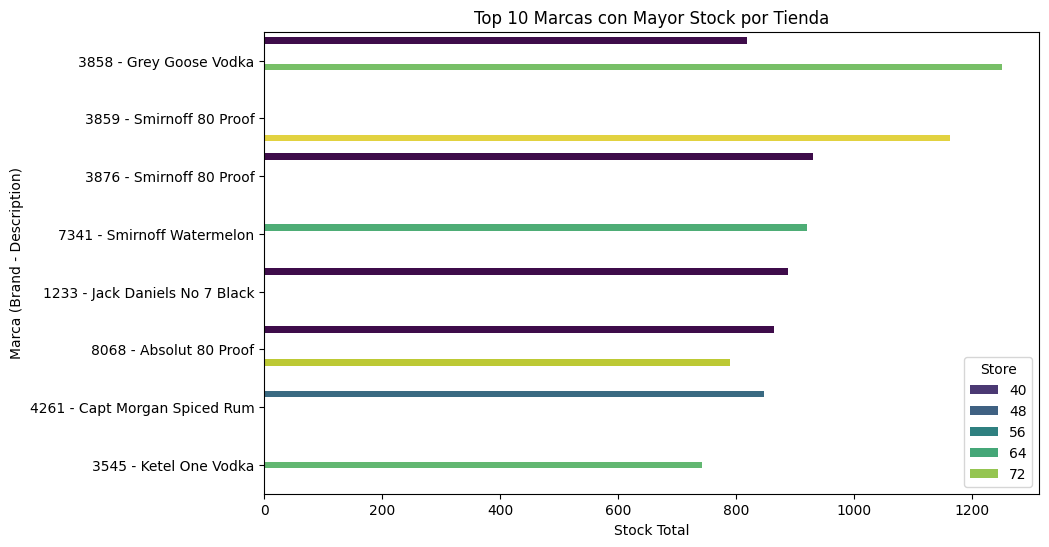

In [35]:
# Crear una nueva columna que combine 'Brand' y 'Description' para mostrar en el gráfico
top_stock['Marca Completa'] = top_stock['Brand'].astype(str) + " - " + top_stock['Description']

# Gráfico de barras horizontales para el top 10 de marcas con mayor stock por tienda
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock Total', y='Marca Completa', hue='Store', data=top_stock, palette='viridis')

# Título y etiquetas
plt.title('Top 10 Marcas con Mayor Stock por Tienda')
plt.xlabel('Stock Total')
plt.ylabel('Marca (Brand - Description)')

plt.show()
